# Figure 14 ignition delay times from LLNL for iso-octane in N2 as bath gas comparing to the Dagaut et al 2014 

In [2]:
import cantera as ct
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt

In [3]:
ct.__version__

'2.4.0'

# Importing the GTL mechanism from Dagaut for Iso-octane and comparing to LLNL and RMG model

In [4]:
gas = ct.Solution('/Users/ebubeajulu/Code/GTL/ic8/Dagaut_DKM.cti')



**** WARNING ****
For species Lc6h6, discontinuity in h/RT detected at Tmid = 1399
	Value computed using low-temperature polynomial:  48.1571
	Value computed using high-temperature polynomial: 48.2049


**** WARNING ****
For species Lc6h4, discontinuity in h/RT detected at Tmid = 1399
	Value computed using low-temperature polynomial:  61.4309
	Value computed using high-temperature polynomial: 61.4712


**** WARNING ****
For species pbzohAqjB, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  49.1357
	Value computed using high-temperature polynomial: 50.2973


**** WARNING ****
For species pbzohAqjB, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  16.0876
	Value computed using high-temperature polynomial: 15.9218


**** WARNING ****
For species pbzohBqjA, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  49.1357
	Value computed using high-tempe

In [5]:
sorted(gas.species_names)

['A1c2h3AC',
 'A1c2hAC',
 'A2-X',
 'A2O',
 'A2oh',
 'ASTYRYL',
 'Ac10h21',
 'Ac4h7-1',
 'Ac5e1oC',
 'Ac5e4oB',
 'Ac5h11',
 'Ac5h9-1',
 'Ac5oB',
 'Ac5oBoC',
 'Ac5oBoD',
 'Ac6e3e5oB',
 'Ac6e5oB',
 'Ac6e5oC',
 'Ac6h11-3',
 'Ac6h13',
 'Ac6h9-15',
 'Ac6oC',
 'Ac7e1oD',
 'Ac7e3oB',
 'Ac7e4oB',
 'Ac7e4oC',
 'Ac7e6oB',
 'Ac7h13-3',
 'Ac7h15',
 'Ac7oBoD',
 'Ac7oBoG',
 'Ac7oD',
 'Ac8e5oC',
 'Ac8h15-4',
 'Ac8h17',
 'Ac9e2oF',
 'Ac9e3oF',
 'Ac9e5oB',
 'Ac9e5oC',
 'Ac9e5oD',
 'Ac9e6oB',
 'Ac9e6oC',
 'Ac9e6oD',
 'Ac9h19',
 'Ac9oBoF',
 'Ac9oCoF',
 'Ac9oDoF',
 'AchxqBqD',
 'Aeche1',
 'AechoB',
 'AechoD',
 'AechoE',
 'Amche1',
 'Amche3',
 'AmchoC',
 'AmchoD',
 'AmchqBqD',
 'Ao2pchohB',
 'Aophc3h4-2',
 'Apche2',
 'ApchoB',
 'ApchoC',
 'ApchoE',
 'ApchoF',
 'ApchohB',
 'ApchqA',
 'ApchqB',
 'ApchqC',
 'ApchqD',
 'ApchqDqF',
 'ApchqE',
 'ApchqF',
 'ApchqG',
 'Aphc2h4',
 'Aphc3h5ohB',
 'BPHPROPY',
 'BSTYRYL',
 'Bc10h21',
 'Bc5e1oC',
 'Bc5h11',
 'Bc5h9-1',
 'Bc5oA',
 'Bc5oAoC',
 'Bc5oAoD',
 'Bc5oAqE',
 'Bc6

In [6]:
for species in gas.species():
    if species.composition == {'C':8, 'H':18}:
        print(species.name)

nc8h18
ic8h18


In [7]:
gas.TP = 900, 16e5
gas.set_equivalence_ratio(phi=1.0, fuel='ic8h18', oxidizer='o2:0.2, n2:0.8' )
gas()



  gas:

       temperature             900  K
          pressure         1.6e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8703e+05         1.77e+07     J
   internal energy      3.3889e+05        1.022e+07     J
           entropy          7226.1        2.179e+05     J/K
    Gibbs function     -5.9164e+06       -1.784e+08     J
 heat capacity c_p          1287.9        3.884e+04     J/K
 heat capacity c_v          1012.2        3.052e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2        0.19685         0.208881         -25.1522
                n2       0.787402         0.731465         -22.0654
            ic8h18       0.015748         0.059654         -96.3342
     [+2179 minor]          

In [8]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=phi, fuel='ic8h18', oxidizer='o2:0.2, n2:0.8' )
    # Then dilute the whole thing 1:2 with extra N2
    X = gas.X / 3.0 
    X[gas.species_index('n2')] += 2./3.
    gas.X = X

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature             900  K
          pressure     1.67954e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      6.2831e+05        1.805e+07     J
   internal energy      3.6783e+05        1.057e+07     J
           entropy          7219.8        2.074e+05     J/K
    Gibbs function     -5.8695e+06       -1.686e+08     J
 heat capacity c_p          1196.3        3.437e+04     J/K
 heat capacity c_v          906.86        2.605e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2      0.0656168        0.0730886         -26.2022
                n2       0.929134         0.906038         -21.8513
            ic8h18     0.00524934        0.0208732         -97.3843
     [+2179 minor]          

In [9]:
# time in microseconds          relative pressure
pressure_profile = """0		                       1.000
50		                       1.004
250		                       1.027
450		                       1.046
650		                       1.062
850		                       1.072
1050	                       1.088
1250	                       1.101
1450	                       1.127
1650	                       1.157
1850	                       1.170
2050	                       1.160
2250	                       1.152
2450	                       1.153
2650	                       1.148
2850	                       1.143
3050	                       1.139
3250	                       1.136
3450	                       1.140
3650	                       1.142
3850	                       1.142
4050	                       1.153
4250	                       1.161
4450	                       1.168
4650	                       1.165
4850	                       1.166
5050	                       1.168
5250	                       1.170
5450	                       1.172
5650	                       1.175
5850	                       1.175
6050	                       1.178
6250	                       1.181
6450	                       1.184
6650	                       1.187
6850	                       1.189
7050	                       1.189
7250	                       1.188
7450	                       1.188
7650	                       1.190
7850	                       1.192
8000	                       1.192
10000	                       1.192
"""
times = []
pressures = []
for l in pressure_profile.splitlines():
    time, pressure = l.split()
    times.append((float(time)/1e6))
    pressures.append(float(pressure))
times = np.array(times)
pressures = np.array(pressures)
times, pressures

(array([0.00e+00, 5.00e-05, 2.50e-04, 4.50e-04, 6.50e-04, 8.50e-04,
        1.05e-03, 1.25e-03, 1.45e-03, 1.65e-03, 1.85e-03, 2.05e-03,
        2.25e-03, 2.45e-03, 2.65e-03, 2.85e-03, 3.05e-03, 3.25e-03,
        3.45e-03, 3.65e-03, 3.85e-03, 4.05e-03, 4.25e-03, 4.45e-03,
        4.65e-03, 4.85e-03, 5.05e-03, 5.25e-03, 5.45e-03, 5.65e-03,
        5.85e-03, 6.05e-03, 6.25e-03, 6.45e-03, 6.65e-03, 6.85e-03,
        7.05e-03, 7.25e-03, 7.45e-03, 7.65e-03, 7.85e-03, 8.00e-03,
        1.00e-02]),
 array([1.   , 1.004, 1.027, 1.046, 1.062, 1.072, 1.088, 1.101, 1.127,
        1.157, 1.17 , 1.16 , 1.152, 1.153, 1.148, 1.143, 1.139, 1.136,
        1.14 , 1.142, 1.142, 1.153, 1.161, 1.168, 1.165, 1.166, 1.168,
        1.17 , 1.172, 1.175, 1.175, 1.178, 1.181, 1.184, 1.187, 1.189,
        1.189, 1.188, 1.188, 1.19 , 1.192, 1.192, 1.192]))

In [10]:
"""
Calculate an array of relative volumes, to correspond
to the array of relative pressures given by `pressures`
assuming isentropic compression/expansion.
"""
initial_pressure = 16e5
gas.TP = 900, initial_pressure
initial_entropy = gas.entropy_mass
initial_density = gas.density
initial_volume = 1.0
volumes = np.ones_like(pressures)
for i, p in enumerate(pressures):
    gas.SP = initial_entropy, p*initial_pressure
    volumes[i] = initial_volume*initial_density/gas.density
volumes

array([1.        , 0.99697827, 0.98000187, 0.96646952, 0.95540166,
       0.94863061, 0.93802287, 0.92960222, 0.91327009, 0.89522296,
       0.88765364, 0.89346307, 0.89817386, 0.8975819 , 0.90055072,
       0.90354217, 0.90595181, 0.90776874, 0.90534802, 0.9041432 ,
       0.9041432 , 0.8975819 , 0.8928782 , 0.88880859, 0.89054748,
       0.88996698, 0.88880859, 0.88765364, 0.88650214, 0.88478129,
       0.88478129, 0.88306809, 0.88136248, 0.87966441, 0.87797383,
       0.87685091, 0.87685091, 0.87741196, 0.87741196, 0.87629068,
       0.87517269, 0.87517269, 0.87517269])

In [45]:
totalp = initial_pressure * pressures
totalp/1e5


array([16.   , 16.064, 16.432, 16.736, 16.992, 17.152, 17.408, 17.616,
       18.032, 18.512, 18.72 , 18.56 , 18.432, 18.448, 18.368, 18.288,
       18.224, 18.176, 18.24 , 18.272, 18.272, 18.448, 18.576, 18.688,
       18.64 , 18.656, 18.688, 18.72 , 18.752, 18.8  , 18.8  , 18.848,
       18.896, 18.944, 18.992, 19.024, 19.024, 19.008, 19.008, 19.04 ,
       19.072, 19.072, 19.072])

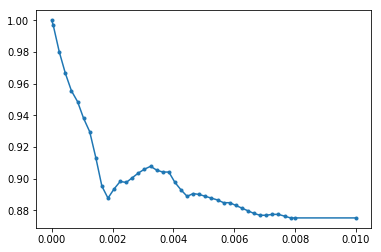

In [11]:
plt.plot(times, volumes, '.-')

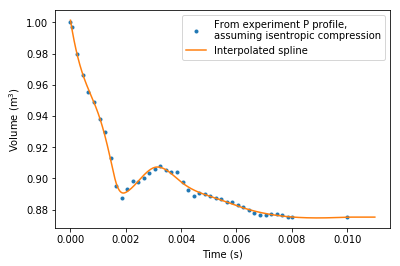

In [12]:
import scipy.interpolate
spl = scipy.interpolate.UnivariateSpline(times, volumes, k=3,s=0.0001, ext='const')
# if ext='const', extrapolation return the boundary value.

plt.plot(times, volumes, '.', label="From experiment P profile,\nassuming isentropic compression")
t=np.linspace(0,max(times)*1.1,1000)
plt.plot(t, spl(t), label="Interpolated spline")
plt.xlabel('Time (s)')
plt.ylabel('Volume (m$^3$)')
plt.legend(loc='best')

In [13]:
spl([0.01, 0.02, 0.03])

array([0.8751922, 0.8751922, 0.8751922])

In [14]:
velocity = spl.derivative(n=1)
print(velocity.ext)
velocity.ext=1 # zeros
print(velocity.ext)

3
1


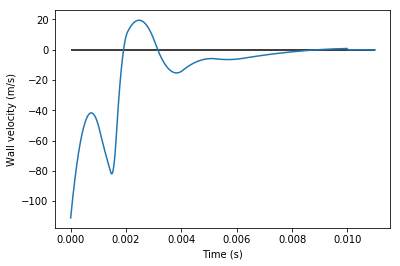

In [15]:
plt.plot(t, velocity(t))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,max(t))

Text(0.5, 1.0, 'Extrapolated to 0.1 s')

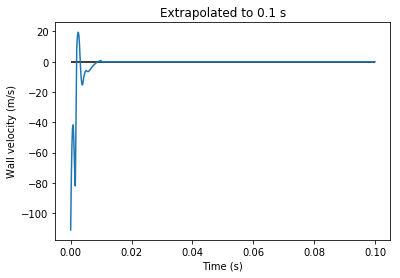

In [16]:
plt.plot(np.append(t,0.1), velocity(np.append(t,0.1)))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,0.1)
plt.title("Extrapolated to 0.1 s")

In [17]:
velocity(0.1)

array(0.)

In [18]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    environment = ct.Reservoir(ct.Solution('air.xml'))

    ct.Wall(reactor, environment, A=1.0, velocity=velocity)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []
    volumes = []
    
    print_data = True
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        volumes.append(reactor.volume)
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
    
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)
    volumes = np.array(volumes)

    if plot:
        plt.plot(times*1e3, volumes)
        plt.ylabel("Volume")
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    
    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index('C2H')   
    i_o = gas.species_index('O')
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
        return ignition_time_ms
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        return np.infty


In [19]:
def get_ignition_delay_air_n2(temperature, pressure_bar=16, phi=1.0, plot=False):
    """
    For figure 14. Uses synthetic air, diluted in N2.
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    """
    gas.TP = temperature, pressure_bar*1e5
    set_gas_concentrations(gas, phi)
    mole_fractions = gas.X
    if plot:
        gas()
    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)
    return time


  gas:

       temperature            1250  K
          pressure     1.67954e+06  Pa
           density         4.64244  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.0611e+06        3.048e+07     J
   internal energy      6.9928e+05        2.009e+07     J
           entropy          7625.6        2.191e+05     J/K
    Gibbs function     -8.4709e+06       -2.433e+08     J
 heat capacity c_p          1269.8        3.648e+04     J/K
 heat capacity c_v          980.37        2.816e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2      0.0656168        0.0730886         -27.1258
                n2       0.929134         0.906038         -22.7253
            ic8h18     0.00524934        0.0208732         -99.0052
     [+2179 minor]          

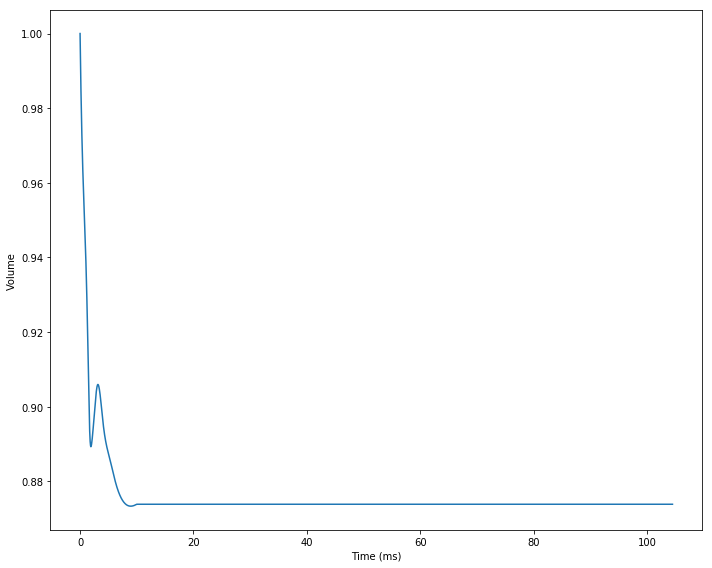

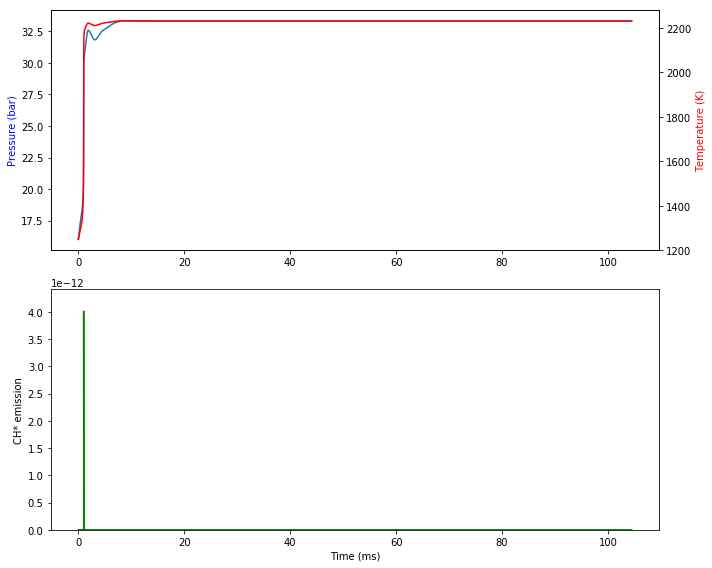

At 1250.0 K 16 bar, ignition delay time is 1.0255571076444765 ms


1.0255571076444765

In [20]:
plt.rcParams['figure.figsize'] = [10, 8]
get_ignition_delay_air_n2(1000/.8, 16, 1, plot=True)


In [32]:
DAG_temperatures = 1000/np.linspace(0.70,1.2,25)
pressures_bar = 16
phi = 1

DAG_results = dict()
times = []
for T in DAG_temperatures:
    t = get_ignition_delay_air_n2(T, pressures_bar, phi, plot=False)
    times.append(t)
    DAG_results[pressures_bar] = times

Reached end time 105.43 ms in 4976 steps
At 1428.5714285714287 K 16 bar, ignition delay time is 0.16482542565061417 ms
Reached end time 104.73 ms in 5109 steps
At 1387.2832369942196 K 16 bar, ignition delay time is 0.257656309708189 ms
Reached end time 103.56 ms in 5033 steps
At 1348.3146067415732 K 16 bar, ignition delay time is 0.38910481723357654 ms
Reached end time 101.79 ms in 5363 steps
At 1311.4754098360656 K 16 bar, ignition delay time is 0.567028979201025 ms
Reached end time 106.30 ms in 5250 steps
At 1276.595744680851 K 16 bar, ignition delay time is 0.7984614725731042 ms
Reached end time 108.81 ms in 5086 steps
At 1243.5233160621763 K 16 bar, ignition delay time is 1.0881554334399073 ms
Reached end time 101.74 ms in 4789 steps
At 1212.1212121212122 K 16 bar, ignition delay time is 1.4315471789223242 ms
Reached end time 100.91 ms in 4835 steps
At 1182.266009852217 K 16 bar, ignition delay time is 1.818456008564203 ms
Reached end time 100.00 ms in 4707 steps
At 1153.8461538461

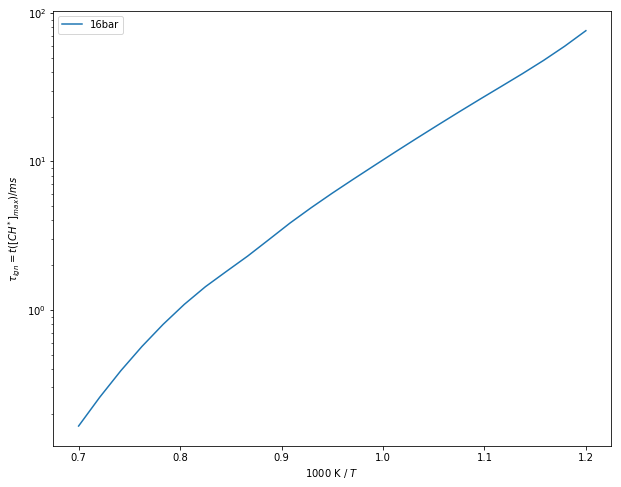

In [33]:
plt.semilogy(1000/DAG_temperatures, times, label='{}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')

plt.rcParams['figure.figsize'] = [10, 8]

In [34]:
import pickle
with open('ic8-LLNL.pkl', 'rb') as fp:
    (LLNL_temperatures, LLNL_results) = pickle.load(fp)

In [46]:
import pickle
with open('ic8-RMG.pkl','rb') as fp:
    (RMG_temperatures, RMG_results) = pickle.load(fp)

In [36]:
import pickle 
with open('ic8_ignition_delay_Dagaut_without_moving_wall.pkl','rb') as f:
    (DAG_temperatures, DAG_results[pressures_bar]) = pickle.load(f)

### Using the predictions for ignition delay of iso-octane with pressure profile from Fig. 14 of Dagaut et al. 

In [37]:
# extracted values of predicted ignition delay for iso-octane in Fig.14 
# using the docstrings
predict_ic8 = """0.657614                 0.0438935
0.660053                 0.0508193
0.668666                 0.0605986
0.674810                 0.0712038
0.682193                 0.0824521
0.690803                 0.0997690
0.695710                 0.117224
0.705556                 0.141850
0.712933                 0.169140
0.722793                 0.193028
0.730166                 0.233559
0.740019                 0.274467
0.748628                 0.332111
0.759721                 0.384622
0.765868                 0.445364
0.775710                 0.546873
0.786810                 0.615061
0.799138                 0.712339
0.806515                 0.849383
0.818843                 0.983721
0.829936                 1.13926
0.843501                 1.31950
0.852120                 1.52800
0.864449                 1.76967
0.878014                 2.04964
0.889110                 2.33921
0.900212                 2.59264
0.910061                 3.09168
0.927338                 3.52918
0.935965                 3.96890
0.942116                 4.52889
0.958153                 5.24581
0.969245                 6.07524
0.985293                 6.73451
0.993909                 7.91373
1.00872                  8.90155
1.02476                  9.86753
1.03338                  11.4268
1.04572                  12.8521
1.06423                  14.6714
1.07409                  16.9904
1.08520                  18.5574
1.10124                  21.1825
1.11357                  23.4784
1.12466                  27.5917
1.13824                  30.1389
1.14933                  35.4191
1.16290                  39.8386
1.17523                  46.1394
1.18633                  51.8925
1.19865                  61.8858
1.20728                  68.5850
1.21961                  80.6040
1.23070                  94.7255
"""

ign_times = []
temps = []

for k in predict_ic8.splitlines():
    temp, ign_time = k.split()
    temps.append(float(temp))
    ign_times.append(float(ign_time))
    
ign_times = np.array(ign_times)
temps = np.array(temps)
#print(temps, ign_times)

In [38]:
experiment_ic8 = """ 0.742197            0.129438
0.792731            0.238540
0.858775            0.582623
0.897119            1.02386
0.916046            1.35725
1.01424             4.07608
1.05446             8.48794
1.08368             10.3738
1.11478             15.2007
1.16585             24.9217
1.17410             28.0282
1.18433             30.0848
"""

exp_ign_times = []
exp_temps = []



for z in experiment_ic8.splitlines():
    exp_temp, exp_ign_time = z.split()
    exp_temps.append(float(exp_temp))
    exp_ign_times.append(float(exp_ign_time))
    
exp_ign_times = np.array(exp_ign_times)
exp_temps = np.array(exp_temps)


Text(0.5, 1.0, "Dagaut's Figure 14, iso-octane")

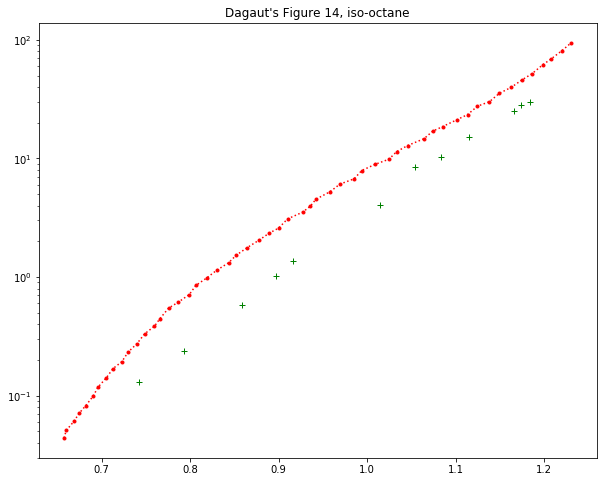

In [39]:
plt.semilogy(temps,ign_times, 'r.:')
plt.semilogy(exp_temps,exp_ign_times, 'g+')
plt.title("Dagaut's Figure 14, iso-octane")

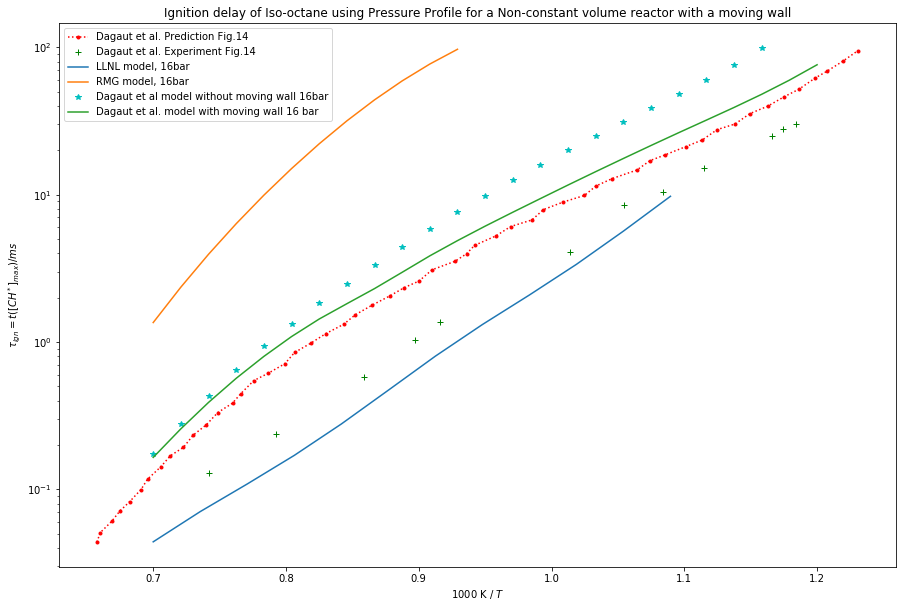

In [47]:

plt.semilogy(temps,ign_times, 'r.:',label='Dagaut et al. Prediction Fig.14'.format(pressures_bar))

plt.semilogy(exp_temps,exp_ign_times, 'g+',label='Dagaut et al. Experiment Fig.14'.format(pressures_bar))

plt.semilogy(1000/LLNL_temperatures,LLNL_results,label='LLNL model, {}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')


plt.semilogy(1000/RMG_temperatures,RMG_results,label='RMG model, {}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')



plt.semilogy(1000/DAG_temperatures, DAG_results[pressures_bar], 'c*',label='Dagaut et al model without moving wall {}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')


plt.semilogy(1000/DAG_temperatures,times,label='Dagaut et al. model with moving wall {} bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [15, 10]

plt.title('Ignition delay of Iso-octane using Pressure Profile for a Non-constant volume reactor with a moving wall')
plt.show()
